<a href="https://colab.research.google.com/github/PECO-chan/Keras-book-practice/blob/master/copy_chap5_catsdogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

kaggle API 使う準備

In [0]:
!pwd

/content


In [0]:
#!ls

sample_data


In [1]:
from google.colab import files
files.upload()
#kaggle.jsonをupload

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juntachibana","key":"169a3a50b01c0a71177801c9f4a95dcf"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
#!pip install kaggle

APIでデータダウンロード・解凍

In [4]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 32.0MB/s]
 94% 256M/271M [00:03<00:00, 60.1MB/s]
100% 271M/271M [00:03<00:00, 78.5MB/s]
100% 541M/543M [00:12<00:00, 56.7MB/s]
100% 543M/543M [00:12<00:00, 46.6MB/s]


In [5]:
!unzip train.zip

Archive:  train.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/cat.10015.jpg     
  inflating: train/cat.10016.jpg     
  inflating: train/cat.10017.jpg     
  inflating: train/cat.10018.jpg     
  inflatin

In [0]:
#!ls train

**Keras本5章の写経していく**

使うデータは一部なので、別ディレクトリに使う分だけコピー

In [0]:
import os
import shutil

In [0]:
original_dataset_dir = "train"

In [0]:
base_dir = "smalldata"
os.mkdir(base_dir)

In [0]:
train_dir = os.path.join(base_dir, "train")
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, "validation")
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, "test")
os.mkdir(test_dir)

In [0]:
train_cats_dir = os.path.join(train_dir, "cats")
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, "dogs")
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, "dogs")
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, "dogs")
os.mkdir(test_dogs_dir)

In [0]:
fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ["cat.{}.jpg".format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ["cat.{}.jpg".format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ["dog.{}.jpg".format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ["dog.{}.jpg".format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
len(os.listdir(train_cats_dir))

1000

In [14]:
len(os.listdir(validation_cats_dir))

500

CNN

In [15]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import optimizers
model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=["acc"])

データ前処理

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode="binary")

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 16s 158ms/step - loss: 0.6874 - acc: 0.5260 - val_loss: 0.6651 - val_acc: 0.6050
Epoch 2/30
100/100 [==============================] - 11s 109ms/step - loss: 0.6563 - acc: 0.6020 - val_loss: 0.6417 - val_acc: 0.6170
Epoch 3/30
100/100 [==============================] - 11s 108ms/step - loss: 0.6157 - acc: 0.6685 - val_loss: 0.6168 - val_acc: 0.6550
Epoch 4/30
100/100 [==============================] - 11s 111ms/step - loss: 0.5685 - acc: 0.7050 - val_loss: 0.6163 - val_acc: 0.6650
Epoch 5/30
100/100 [==============================] - 11s 108ms/step - loss: 0.5335 - acc: 0.7230 - val_loss: 0.6140 - val_acc: 0.6630
Epoch 6/30
100/100 [==============================] - 11s 107ms/step - loss: 0.5133 - acc: 0.7530 - val_loss: 0.5828 - val_acc: 0.6940
Epoch 7/30
100/100 [==============================] - 11s 108ms/step - loss: 0.4886 - acc: 0.7580 - val_loss: 0.6060 - val_acc: 0.6870
Epoch 8/30
100/100 [==============================] - 1

In [0]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [0]:
#ジェネレータ実験
def get_primes(x=2):
  while True:
    for i in range(2, x):
      if x%i == 0:
        break
    else:
      yield x
    x += 1

In [0]:
gen = get_primes()
for idx, x in enumerate(gen):
  print(x)
  if idx == 10:
    break

2
3
5
7
11
13
17
19
23
29
31


データオーグメンテーション

In [0]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             fill_mode = "nearest")

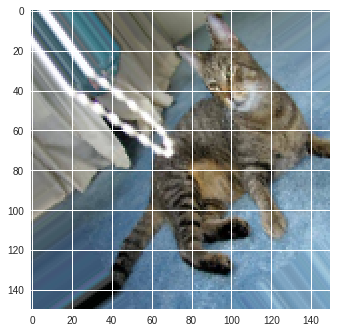

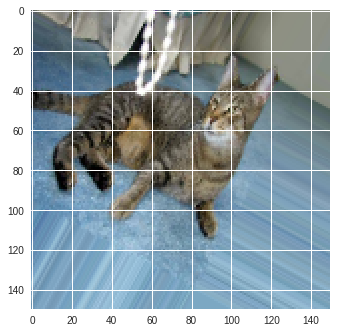

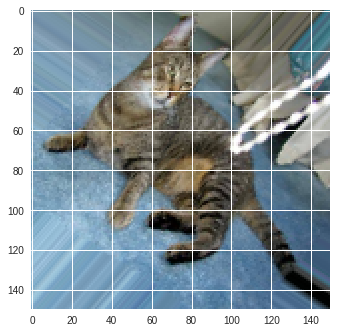

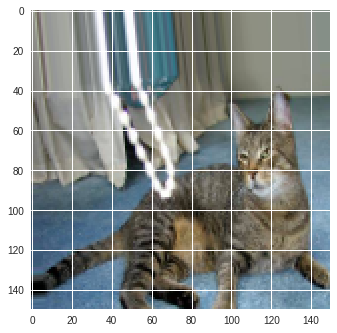

In [0]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size = (150, 150))
x = image.img_to_array(img)
x = x.reshape((1, ) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size = 1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i%4 == 0:
    break
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=["acc"])

In [0]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   rescale = 1./255,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = "nearest")

test_datagen = ImageDataGenerator(rescale=1./255)

In [206]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150, 150),
  batch_size=32,
  class_mode="binary")

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150, 150),
  batch_size=32,
  class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [207]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch=100,
  epochs=100,
  validation_data = validation_generator,
  validation_steps=50)

Epoch 1/100
100/100 [==============================] - 35s 346ms/step - loss: 0.6926 - acc: 0.5187 - val_loss: 0.6824 - val_acc: 0.5641
Epoch 2/100
100/100 [==============================] - 31s 306ms/step - loss: 0.6806 - acc: 0.5462 - val_loss: 0.6625 - val_acc: 0.5966
Epoch 3/100
100/100 [==============================] - 31s 305ms/step - loss: 0.6669 - acc: 0.5772 - val_loss: 0.6383 - val_acc: 0.6409
Epoch 4/100
100/100 [==============================] - 30s 304ms/step - loss: 0.6470 - acc: 0.6144 - val_loss: 0.6193 - val_acc: 0.6411
Epoch 5/100
100/100 [==============================] - 31s 307ms/step - loss: 0.6299 - acc: 0.6419 - val_loss: 0.6076 - val_acc: 0.6555
Epoch 6/100
100/100 [==============================] - 30s 305ms/step - loss: 0.6042 - acc: 0.6656 - val_loss: 0.6461 - val_acc: 0.6237
Epoch 7/100
100/100 [==============================] - 31s 310ms/step - loss: 0.6089 - acc: 0.6687 - val_loss: 0.5876 - val_acc: 0.6853
Epoch 8/100
100/100 [===========================

In [0]:
model.save("cats_and_dogs_small_2.h5")

学習済みモデルの利用

In [17]:
from keras.applications import VGG16

conv_base = VGG16(weights="imagenet",
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
'''
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.summary()
'''

In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(rescale=1./255)
#datagen = ImageDataGenerator()
batch_size = 20

In [0]:
import matplotlib.pyplot as plt

Found 2000 images belonging to 2 classes.
1
cats
(1, 256, 256, 3)
[[[0.32156864 0.2901961  0.28235295]
  [0.33333334 0.3019608  0.29411766]
  [0.3529412  0.32156864 0.3137255 ]
  ...
  [0.29803923 0.29803923 0.2509804 ]
  [0.30588236 0.30588236 0.25882354]
  [0.30588236 0.30588236 0.25882354]]

 [[0.34509805 0.3137255  0.30588236]
  [0.34509805 0.3137255  0.30588236]
  [0.33333334 0.3019608  0.29411766]
  ...
  [0.30588236 0.29803923 0.2509804 ]
  [0.30588236 0.29803923 0.2509804 ]
  [0.30980393 0.3019608  0.25490198]]

 [[0.33333334 0.3019608  0.29411766]
  [0.34117648 0.30980393 0.3019608 ]
  [0.34901962 0.31764707 0.30980393]
  ...
  [0.32156864 0.29411766 0.25490198]
  [0.32156864 0.29411766 0.25490198]
  [0.32156864 0.29411766 0.25490198]]

 ...

 [[0.23529413 0.21568629 0.20392159]
  [0.23137257 0.21176472 0.20000002]
  [0.21960786 0.20000002 0.18823531]
  ...
  [0.03529412 0.03529412 0.03529412]
  [0.03921569 0.03921569 0.03921569]
  [0.04313726 0.04313726 0.04313726]]

 [[0.219

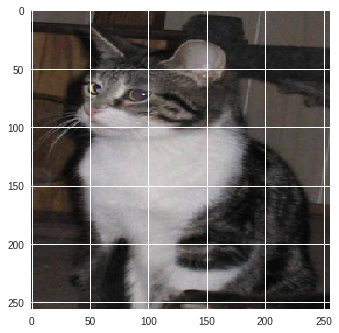

In [83]:
g = datagen.flow_from_directory(train_dir, batch_size = 1, class_mode="binary")
reverse_dict = dict([(j, i) for i, j in g.class_indices.items()])

for i, j in g:
  img = i
  print(len(img))
  print(reverse_dict[j[0]])
  #print(j)
  break
  
print(img.shape)
#img = img.reshape((256,256,3))
print(img[0])
plt.imshow(img[0])

In [61]:
print(g.class_indices.items())
reverse_dict = dict([(j, i) for i, j in g.class_indices.items()])
print(reverse_dict[0])
print(reverse_dict[1])

dict_items([('cats', 0), ('dogs', 1)])
cats
dogs


In [0]:
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(directory,
                                          target_size=(150, 150),
                                          batch_size=batch_size,
                                          class_mode="binary")
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
      
  return features, labels

In [89]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [0]:
from keras import models
from keras import layers
from keras import optimizers

In [0]:
model = models.Sequential()
model.add(layers.Dense(256, activation="relu", input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss="binary_crossentropy",
              metrics=["acc"])

In [0]:
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data = (validation_features, validation_labels))

In [0]:
import numpy as np
import tensorflow as tf
import random as rn

import os
os.environ['PYTHONHASHSEED'] = '0'

np.random.seed(5726)
rn.seed(5726)

session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

from keras import backend as K

tf.set_random_seed(5726)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [0]:
model = models.Sequential()
model.add(layers.Dense(256, activation="relu", input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss="binary_crossentropy",
              metrics=["acc"])

In [127]:
history = model.fit(train_features, train_labels,
                    epochs=10,
                    batch_size=20,
                    validation_data = (validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/10
2000/2000 [==============================] - 1s 609us/step - loss: 0.6170 - acc: 0.6580 - val_loss: 0.4489 - val_acc: 0.8220
Epoch 2/10
2000/2000 [==============================] - 1s 381us/step - loss: 0.4524 - acc: 0.7830 - val_loss: 0.3700 - val_acc: 0.8560
Epoch 3/10
2000/2000 [==============================] - 1s 378us/step - loss: 0.3540 - acc: 0.8395 - val_loss: 0.3254 - val_acc: 0.8740
Epoch 4/10
2000/2000 [==============================] - 1s 380us/step - loss: 0.3256 - acc: 0.8625 - val_loss: 0.3020 - val_acc: 0.8860
Epoch 5/10
2000/2000 [==============================] - 1s 372us/step - loss: 0.2875 - acc: 0.8880 - val_loss: 0.2890 - val_acc: 0.8870
Epoch 6/10
2000/2000 [==============================] - 1s 389us/step - loss: 0.2644 - acc: 0.8945 - val_loss: 0.2763 - val_acc: 0.8970
Epoch 7/10
2000/2000 [==============================] - 1s 380us/step - loss: 0.2488 - acc: 0.9020 - val_loss: 0.2680 - val_acc: 0.8950


In [0]:
os.environ['PYTHONHASHSEED'] = '0'

np.random.seed(5726)
rn.seed(5726)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
tf.set_random_seed(5726)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [0]:
model = models.Sequential()
model.add(layers.Dense(256, activation="relu", input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss="binary_crossentropy",
              metrics=["acc"])

In [130]:
history = model.fit(train_features, train_labels,
                    epochs=10,
                    batch_size=20,
                    validation_data = (validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/10
2000/2000 [==============================] - 1s 624us/step - loss: 0.6170 - acc: 0.6580 - val_loss: 0.4489 - val_acc: 0.8220
Epoch 2/10
2000/2000 [==============================] - 1s 394us/step - loss: 0.4524 - acc: 0.7830 - val_loss: 0.3700 - val_acc: 0.8560
Epoch 3/10
2000/2000 [==============================] - 1s 392us/step - loss: 0.3540 - acc: 0.8395 - val_loss: 0.3254 - val_acc: 0.8740
Epoch 4/10
2000/2000 [==============================] - 1s 379us/step - loss: 0.3256 - acc: 0.8625 - val_loss: 0.3020 - val_acc: 0.8860
Epoch 5/10
2000/2000 [==============================] - 1s 368us/step - loss: 0.2875 - acc: 0.8880 - val_loss: 0.2890 - val_acc: 0.8870
Epoch 6/10
2000/2000 [==============================] - 1s 379us/step - loss: 0.2644 - acc: 0.8945 - val_loss: 0.2763 - val_acc: 0.8970
Epoch 7/10
2000/2000 [==============================] - 1s 387us/step - loss: 0.2488 - acc: 0.9020 - val_loss: 0.2680 - val_acc: 0.8950


**再現性できた！！！**

In [0]:
from keras import models
from keras import layers

In [0]:
#再現性の設定したせいで、必要になったっぽい
#init = K.tf.global_variables_initializer() 
#K.get_session().run(init)
K.clear_session()

In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights="imagenet",
                  include_top=False,
                  input_shape=(150, 150, 3))

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

In [193]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [0]:
conv_base.trainable = False

In [195]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
  rescale = 1./255,
  rotation_range = 40,
  width_shift_range = 0.2,
  height_shift_range = 0.2,
  shear_range = 0.2,
  zoom_range = 0.2,
  horizontal_flip = True,
  fill_mode = "nearest")

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size = (150, 150),
  batch_size = 20,
  class_mode = "binary")

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size = (150, 150),
  batch_size = 20,
  class_mode = "binary")

model.compile(loss="binary_crossentropy",
              optimizer = optimizers.RMSprop(lr=2e-5),
              metrics=["acc"])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [196]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50,
                              verbose=2)

Epoch 1/30
 - 27s - loss: 0.7154 - acc: 0.5880 - val_loss: 0.4986 - val_acc: 0.7970
Epoch 2/30
 - 25s - loss: 0.5745 - acc: 0.6910 - val_loss: 0.4213 - val_acc: 0.8290
Epoch 3/30
 - 25s - loss: 0.5158 - acc: 0.7410 - val_loss: 0.3932 - val_acc: 0.8340
Epoch 4/30
 - 25s - loss: 0.4743 - acc: 0.7775 - val_loss: 0.3462 - val_acc: 0.8590
Epoch 5/30
 - 25s - loss: 0.4476 - acc: 0.7910 - val_loss: 0.3315 - val_acc: 0.8590
Epoch 6/30
 - 25s - loss: 0.4322 - acc: 0.8025 - val_loss: 0.3175 - val_acc: 0.8720
Epoch 7/30
 - 25s - loss: 0.4237 - acc: 0.8000 - val_loss: 0.3040 - val_acc: 0.8710
Epoch 8/30
 - 25s - loss: 0.3930 - acc: 0.8125 - val_loss: 0.2954 - val_acc: 0.8800
Epoch 9/30
 - 25s - loss: 0.4069 - acc: 0.8180 - val_loss: 0.2902 - val_acc: 0.8810
Epoch 10/30
 - 25s - loss: 0.3834 - acc: 0.8275 - val_loss: 0.2882 - val_acc: 0.8820
Epoch 11/30
 - 25s - loss: 0.3791 - acc: 0.8210 - val_loss: 0.2813 - val_acc: 0.8820
Epoch 12/30
 - 25s - loss: 0.3771 - acc: 0.8310 - val_loss: 0.2810 - val_a

In [197]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50,
                              verbose=2)

Epoch 1/20
 - 26s - loss: 0.3068 - acc: 0.8615 - val_loss: 0.2599 - val_acc: 0.8820
Epoch 2/20
 - 25s - loss: 0.3130 - acc: 0.8550 - val_loss: 0.2339 - val_acc: 0.9030
Epoch 3/20
 - 25s - loss: 0.3140 - acc: 0.8660 - val_loss: 0.2509 - val_acc: 0.8940
Epoch 4/20
 - 25s - loss: 0.3289 - acc: 0.8520 - val_loss: 0.2438 - val_acc: 0.8960
Epoch 5/20
 - 25s - loss: 0.3190 - acc: 0.8535 - val_loss: 0.2421 - val_acc: 0.8920
Epoch 6/20
 - 25s - loss: 0.3027 - acc: 0.8685 - val_loss: 0.2481 - val_acc: 0.9040
Epoch 7/20
 - 25s - loss: 0.3175 - acc: 0.8560 - val_loss: 0.2414 - val_acc: 0.8940
Epoch 8/20
 - 25s - loss: 0.3083 - acc: 0.8645 - val_loss: 0.2345 - val_acc: 0.9000
Epoch 9/20
 - 25s - loss: 0.2993 - acc: 0.8730 - val_loss: 0.2484 - val_acc: 0.8900
Epoch 10/20
 - 25s - loss: 0.3054 - acc: 0.8685 - val_loss: 0.2514 - val_acc: 0.8990
Epoch 11/20
 - 25s - loss: 0.3022 - acc: 0.8610 - val_loss: 0.2297 - val_acc: 0.9000
Epoch 12/20
 - 25s - loss: 0.2944 - acc: 0.8670 - val_loss: 0.2243 - val_a

In [198]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50,
                              verbose=2)

Epoch 1/30
 - 27s - loss: 0.2762 - acc: 0.8860 - val_loss: 0.2298 - val_acc: 0.9040
Epoch 2/30
 - 25s - loss: 0.2955 - acc: 0.8645 - val_loss: 0.2427 - val_acc: 0.9020
Epoch 3/30
 - 25s - loss: 0.2911 - acc: 0.8740 - val_loss: 0.2290 - val_acc: 0.8980
Epoch 4/30
 - 25s - loss: 0.2926 - acc: 0.8760 - val_loss: 0.2519 - val_acc: 0.8890
Epoch 5/30
 - 25s - loss: 0.2894 - acc: 0.8725 - val_loss: 0.2391 - val_acc: 0.9060
Epoch 6/30
 - 25s - loss: 0.3066 - acc: 0.8685 - val_loss: 0.2411 - val_acc: 0.8990
Epoch 7/30
 - 25s - loss: 0.2963 - acc: 0.8730 - val_loss: 0.2364 - val_acc: 0.8970
Epoch 8/30
 - 25s - loss: 0.2959 - acc: 0.8725 - val_loss: 0.2415 - val_acc: 0.8970
Epoch 9/30
 - 25s - loss: 0.2992 - acc: 0.8700 - val_loss: 0.2553 - val_acc: 0.9010
Epoch 10/30
 - 25s - loss: 0.2906 - acc: 0.8820 - val_loss: 0.2338 - val_acc: 0.8970
Epoch 11/30
 - 25s - loss: 0.2860 - acc: 0.8805 - val_loss: 0.2395 - val_acc: 0.8980
Epoch 12/30
 - 25s - loss: 0.2892 - acc: 0.8745 - val_loss: 0.2445 - val_a

KeyboardInterrupt: ignored

ファインチューニング

In [0]:
conv_base.trainable = True

In [0]:
set_trainable = False

In [0]:
for layer in conv_base.layers:
  if layer.name == "block5_conv1":
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [0]:
model.compile(loss="binary_crossentropy",
              optimizer = optimizers.RMSprop(lr=1e-5),
              metrics=["acc"])

In [203]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50,
                              verbose=2)

Epoch 1/100
 - 28s - loss: 0.3020 - acc: 0.8720 - val_loss: 0.2364 - val_acc: 0.9060
Epoch 2/100
 - 26s - loss: 0.2848 - acc: 0.8705 - val_loss: 0.2564 - val_acc: 0.8950
Epoch 3/100
 - 26s - loss: 0.2360 - acc: 0.9090 - val_loss: 0.1858 - val_acc: 0.9360
Epoch 4/100
 - 26s - loss: 0.2290 - acc: 0.9105 - val_loss: 0.1996 - val_acc: 0.9210
Epoch 5/100
 - 26s - loss: 0.2206 - acc: 0.9050 - val_loss: 0.2376 - val_acc: 0.9120
Epoch 6/100
 - 26s - loss: 0.2093 - acc: 0.9070 - val_loss: 0.1936 - val_acc: 0.9230
Epoch 7/100
 - 26s - loss: 0.1909 - acc: 0.9185 - val_loss: 0.1627 - val_acc: 0.9390
Epoch 8/100
 - 26s - loss: 0.1745 - acc: 0.9360 - val_loss: 0.2216 - val_acc: 0.9230
Epoch 9/100
 - 25s - loss: 0.1662 - acc: 0.9380 - val_loss: 0.1683 - val_acc: 0.9340
Epoch 10/100
 - 25s - loss: 0.1660 - acc: 0.9330 - val_loss: 0.2336 - val_acc: 0.9160
Epoch 11/100
 - 25s - loss: 0.1495 - acc: 0.9440 - val_loss: 0.2367 - val_acc: 0.9320
Epoch 12/100


KeyboardInterrupt: ignored

**CNN可視化**

In [211]:
from keras.models import load_model
model = load_model("cats_and_dogs_small_2.h5")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
img_path = os.path.join(test_cats_dir, "cat.1700.jpg")

from keras.preprocessing import image
import numpy as np

In [0]:
img = image.load_img(img_path, target_size = (150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)

img_tensor /= 255.

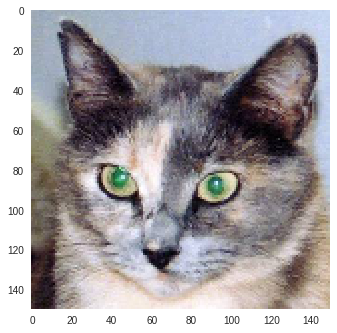

In [217]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.grid(False)
plt.show()

In [0]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [0]:
activations = activation_model.predict(img_tensor)

In [221]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


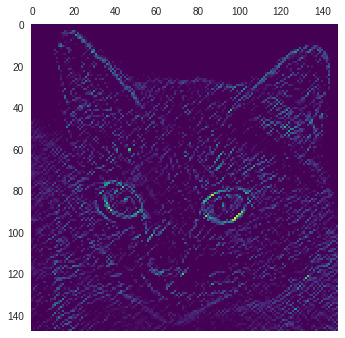

In [223]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0,:,:,3], cmap="viridis")
plt.grid(False)
plt.show()

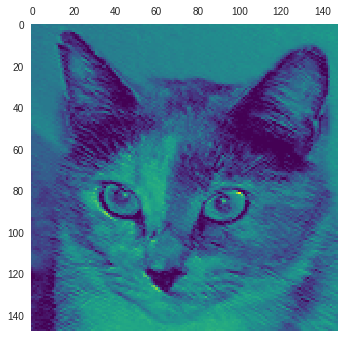

In [224]:
plt.matshow(first_layer_activation[0,:,:,30], cmap="viridis")
plt.grid(False)
plt.show()